<h1><center>Final Project</center></h1>
<h3><center>Zining Wang, CSE291</center></h3>   

First, read and preprocess the data:

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr

%config InlineBackend.figure_format = 'png'
%matplotlib inline

train = pd.read_csv("./data/train.csv")
test = pd.read_csv("./data/test.csv")
testID = test.Id
train.head()

print train.shape

# from collections import Counter
# Counter(train.MiscFeature)
# Adjust House Price based on CPI index, Convert to 2010 December dollars (CPI indices are from Bureau of Labor Statistics)

# train.ix[(train.YrSold == 2010) & 
#          ((train.MoSold == 7)|(train.MoSold == 6)|(train.MoSold <= 4)),
#          'SalePrice'] = train.SalePrice * 1.01
# train.ix[(train.YrSold == 2009) & 
#          ((train.MoSold == 1)|(train.MoSold == 6)|(train.MoSold <= 4)),
#          'SalePrice'] = train.SalePrice * 1.04
# train.ix[(train.YrSold == 2009) & 
#          ((train.MoSold == 2)|(train.MoSold == 3)|(train.MoSold == 4)),
#          'SalePrice'] = train.SalePrice * 1.03
# train.ix[(train.YrSold == 2009) & 
#          ((train.MoSold == 5)|(train.MoSold == 6)|(train.MoSold == 7)|(train.MoSold == 8)),
#          'SalePrice'] = train.SalePrice * 1.02
# train.ix[(train.YrSold == 2009) & 
#          ((train.MoSold >= 9)),
#          'SalePrice'] = train.SalePrice * 1.01
# train.ix[(train.YrSold == 2008) & 
#          ((train.MoSold == 1)|(train.MoSold == 12)),
#          'SalePrice'] = train.SalePrice * 1.04
# train.ix[(train.YrSold == 2008) & 
#          ((train.MoSold == 3)|(train.MoSold == 11)),
#          'SalePrice'] = train.SalePrice * 1.03
# train.ix[(train.YrSold == 2008) & 
#          ((train.MoSold == 5)|(train.MoSold == 10)),
#          'SalePrice'] = train.SalePrice * 1.01
# train.ix[(train.YrSold == 2007) & 
#          ((train.MoSold == 1)|(train.MoSold == 2)),
#          'SalePrice'] = train.SalePrice * 1.08
# train.ix[(train.YrSold == 2007) & 
#          ((train.MoSold == 3)),
#          'SalePrice'] = train.SalePrice * 1.07
# train.ix[(train.YrSold == 2007) & 
#          ((train.MoSold == 4)),
#          'SalePrice'] = train.SalePrice * 1.06
# train.ix[(train.YrSold == 2007) & 
#          ((train.MoSold == 5)|(train.MoSold == 6)|(train.MoSold == 7)|(train.MoSold == 8)|(train.MoSold == 9)|(train.MoSold == 10)),
#          'SalePrice'] = train.SalePrice * 1.05
# train.ix[(train.YrSold == 2007) & 
#          ((train.MoSold == 11)|(train.MoSold == 12)),
#          'SalePrice'] = train.SalePrice * 1.04
# train.ix[(train.YrSold == 2006) & 
#          ((train.MoSold == 1)),
#          'SalePrice'] = train.SalePrice * 1.11
# train.ix[(train.YrSold == 2006) & 
#          ((train.MoSold == 2)|(train.MoSold == 3)),
#          'SalePrice'] = train.SalePrice * 1.10
# train.ix[(train.YrSold == 2006) & 
#          ((train.MoSold == 4)|(train.MoSold >= 10)),
#          'SalePrice'] = train.SalePrice * 1.09
# train.ix[(train.YrSold == 2006) & 
#          ((train.MoSold == 5)|(train.MoSold == 6)|(train.MoSold == 7)|(train.MoSold == 9)),
#          'SalePrice'] = train.SalePrice * 1.08
# train.ix[(train.YrSold == 2006) & 
#          ((train.MoSold == 8)),
#          'SalePrice'] = train.SalePrice * 1.07


# Converting features and filling missing values...
train['MSSubClass'] = train['MSSubClass'].astype(str)
test['MSSubClass'] = test['MSSubClass'].astype(str)
test['MSZoning'] = test['MSZoning'].fillna(train['MSZoning'].mode()[0])
train['LotFrontage'] = train['LotFrontage'].fillna(train['LotFrontage'].mean())
test['LotFrontage'] = test['LotFrontage'].fillna(train['LotFrontage'].mean())
train['Alley'] = train['Alley'].fillna('NoAlleyAccess')
test['Alley'] = test['Alley'].fillna('NoAlleyAccess')
train['MasVnrType'] = train['MasVnrType'].fillna(train['MasVnrType'].mode()[0])
test['MasVnrType'] = test['MasVnrType'].fillna(train['MasVnrType'].mode()[0])

# Impute test data with the most common category
for col in ('BsmtFullBath','BsmtHalfBath','Exterior1st','Exterior2nd','Functional'):
    test[col] = test[col].fillna(train[col].mode()[0])
# Impute test data with mean
test['BsmtUnfSF'] = test['BsmtUnfSF'].fillna(train['BsmtUnfSF'].mean())
    
train['Fence'] = train['Fence'].fillna('NoFence')    
test['Fence'] = test['Fence'].fillna('NoFence')

for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    train[col] = train[col].fillna('NoBasement')
    test[col] = test[col].fillna('NoBasement')
for col in ('BsmtFinSF1','BsmtFinSF2'):
    test[col] = test[col].fillna(0.0)
test['TotalBsmtSF'] = test['TotalBsmtSF'].fillna(0)
train['Electrical'] = train['Electrical'].fillna(train['Electrical'].mode()[0])
test['KitchenQual'] = test['KitchenQual'].fillna(train['KitchenQual'].mode()[0])
train['FireplaceQu'] = train['FireplaceQu'].fillna('NoFirePlace')
test['FireplaceQu'] = test['FireplaceQu'].fillna('NoFirePlace')
train['PoolQC'] = train['PoolQC'].fillna('NoPool')
test['PoolQC'] = test['PoolQC'].fillna('NoPool')
train['MiscFeature'] = train['MiscFeature'].fillna('NoMisc')
test['MiscFeature'] = test['PoolQC'].fillna('NoMisc')

for col in ('GarageType', 'GarageFinish', 'GarageQual','GarageCond','GarageYrBlt'):
    train[col] = train[col].fillna('NoGarage')
    test[col] = test[col].fillna('NoGarage')
test['GarageCars'] = test['GarageCars'].fillna(0.0)
test['GarageArea'] = test['GarageArea'].fillna(0.0)

train['MasVnrArea'] = train['MasVnrArea'].fillna(0.0)
test['MasVnrArea'] = test['MasVnrArea'].fillna(0.0)


train['YrSold'] = train['YrSold'].astype(str)
test['MoSold'] = test['MoSold'].astype(str)


test['SaleType'] = test['SaleType'].fillna(train['SaleType'].mode()[0])


train = train.drop('Id',1)
test = test.drop('Id',1)
train = train.drop('Utilities',1)
test = test.drop('Utilities',1)


train_len = len(train)

trainX = train.drop('SalePrice',1)
trainY = train.SalePrice
testX = test

trainX.head()

(1460, 81)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NoAlleyAccess,Reg,Lvl,Inside,Gtl,...,0,0,NoPool,NoFence,NoMisc,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NoAlleyAccess,Reg,Lvl,FR2,Gtl,...,0,0,NoPool,NoFence,NoMisc,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NoAlleyAccess,IR1,Lvl,Inside,Gtl,...,0,0,NoPool,NoFence,NoMisc,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NoAlleyAccess,IR1,Lvl,Corner,Gtl,...,0,0,NoPool,NoFence,NoMisc,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NoAlleyAccess,IR1,Lvl,FR2,Gtl,...,0,0,NoPool,NoFence,NoMisc,0,12,2008,WD,Normal


Dummy code all categorical variables(46 out of 79 variables are categorical)

In [39]:
#print train.LotArea.dtype
count = 0
train_len = len(train)
alldata = pd.concat(objs=[trainX, testX], axis=0)
for col in alldata.columns:
    if alldata[col].dtype != 'int64' and alldata[col].dtype != 'float64':
        #count += 1
        #print 'The attribute', col, 'is',alldata[col].dtype, ' not numerical types. So we will drop it..'
        
        # concatenate the dummy variables and drop the duplicates
        alldata = pd.concat([alldata,pd.get_dummies(alldata[col]).iloc[:, 1:]], axis=1)
        alldata = alldata.drop(col,1)
    else:
        Xmin = min(alldata[:train_len][col])
        Xmax = max(alldata[:train_len][col])
        alldata[col] = [(x - Xmin+0.0)/(Xmax - Xmin) for x in alldata[col]]
# train_preprocessed = dataset_preprocessed[:train_objs_num]
# test_preprocessed = dataset_preprocessed[train_objs_num:]
#print count


trainX = alldata[:train_len]
testX = alldata[train_len:]


print alldata.columns
alldata.head()

Index([ u'LotFrontage',      u'LotArea',  u'OverallQual',  u'OverallCond',
          u'YearBuilt', u'YearRemodAdd',   u'MasVnrArea',   u'BsmtFinSF1',
         u'BsmtFinSF2',    u'BsmtUnfSF',
       ...
              u'ConLI',        u'ConLw',          u'New',          u'Oth',
                 u'WD',      u'AdjLand',       u'Alloca',       u'Family',
             u'Normal',      u'Partial'],
      dtype='object', length=407)


,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
0,0.150685,0.033420,0.666667,0.500,0.949275,0.883333,0.12250,0.125089,0.0,0.064212,...,0,0,0,0,1,0,0,0,1,0
1,0.202055,0.038795,0.555556,0.875,0.753623,0.433333,0.00000,0.173281,0.0,0.121575,...,0,0,0,0,1,0,0,0,1,0
2,0.160959,0.046507,0.666667,0.500,0.934783,0.866667,0.10125,0.086109,0.0,0.185788,...,0,0,0,0,1,0,0,0,1,0
3,0.133562,0.038561,0.666667,0.500,0.311594,0.333333,0.00000,0.038271,0.0,0.231164,...,0,0,0,0,1,0,0,0,0,0
4,0.215753,0.060576,0.777778,0.500,0.927536,0.833333,0.21875,0.116052,0.0,0.209760,...,0,0,0,0,1,0,0,0,1,0


Do some basic plots to see correlations

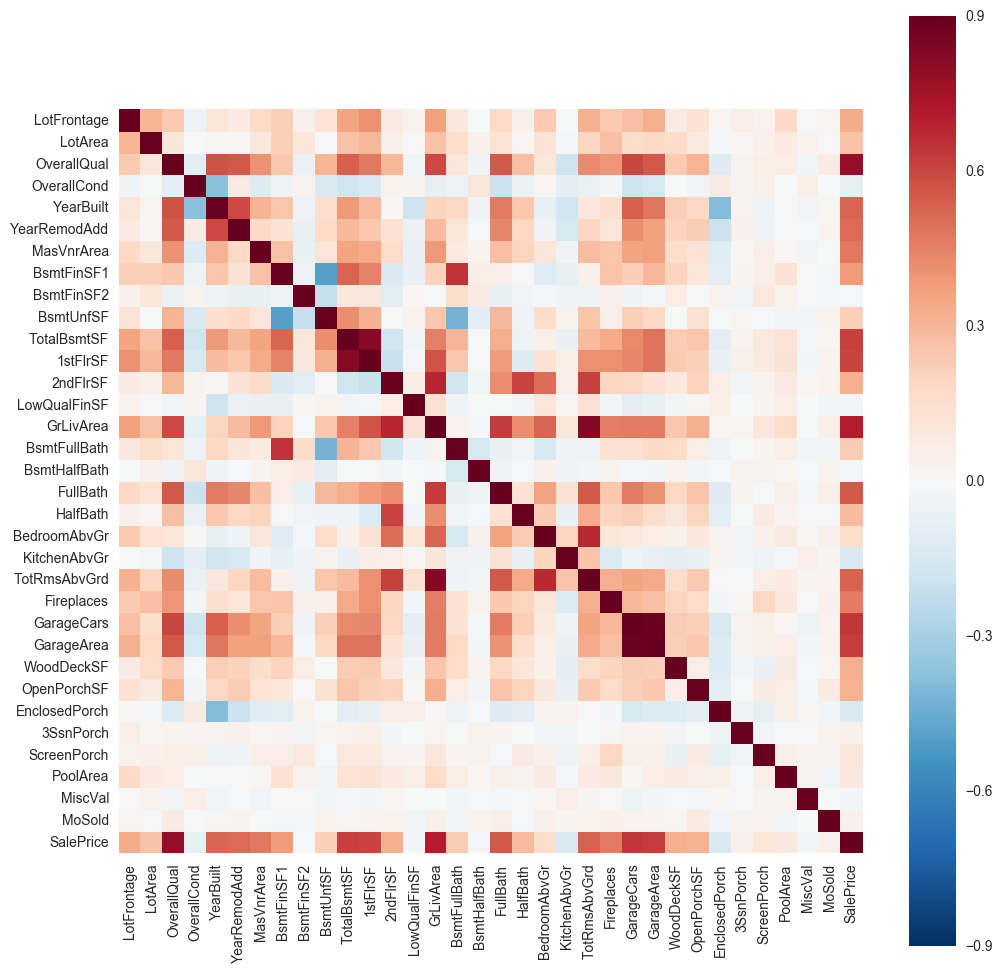

In [40]:
# # Check numbers of NA..
# NAs = pd.concat([train.isnull().sum(), test.isnull().sum()], axis=1, keys=['Train', 'Test'])
# print NAs[NAs.sum(axis=1) > 0]

# # drop columns with over 500 missing values...
# for mis in NAs[NAs.sum(axis=1) > 500].index:
#     train = train.drop(mis,1)

# Check numbers of NA..
# NAs = pd.concat([train.isnull().sum(), test.isnull().sum()], axis=1, keys=['Train', 'Test'])
# print NAs[NAs.Train > 0]
    
# Plot the correlation of Ground Living Area
# Make a correlation map to determine which features are not very correlated with SalePrice
corrmat = train.corr()
corrmat.head()
plt.subplots(figsize=(12,12))
sns.heatmap(corrmat, vmax=0.9, square=True)

In [41]:
# See top 15 most important numerical features
#Contributed by Wenxuan
corrmat_val = corrmat.ix['SalePrice']
corrmat_val.sort_values(inplace = True, ascending = False)
most_correlated = corrmat_val[0:16]
most_correlated
core_attributes = []
for x in most_correlated.index:
    core_attributes.append(x)
train_core = train[[x for x in core_attributes]]
train_core.head()

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,MasVnrArea,Fireplaces,BsmtFinSF1,LotFrontage,WoodDeckSF
0,208500,7,1710,2,548,856,856,2,8,2003,2003,196.0,0,706,65.0,0
1,181500,6,1262,2,460,1262,1262,2,6,1976,1976,0.0,1,978,80.0,298
2,223500,7,1786,2,608,920,920,2,6,2001,2002,162.0,1,486,68.0,0
3,140000,7,1717,3,642,756,961,1,7,1915,1970,0.0,1,216,60.0,0
4,250000,8,2198,3,836,1145,1145,2,9,2000,2000,350.0,1,655,84.0,192


Run Regularized Linear Regression on the selected attributes. We evaluate scoring metrics using mean squared error.

Pairwise Correlation


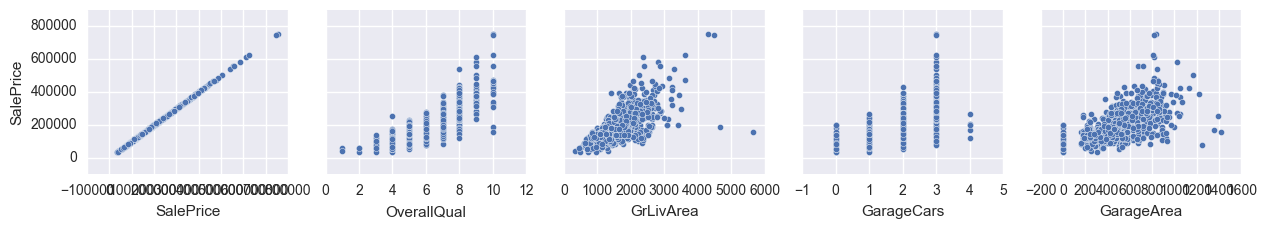

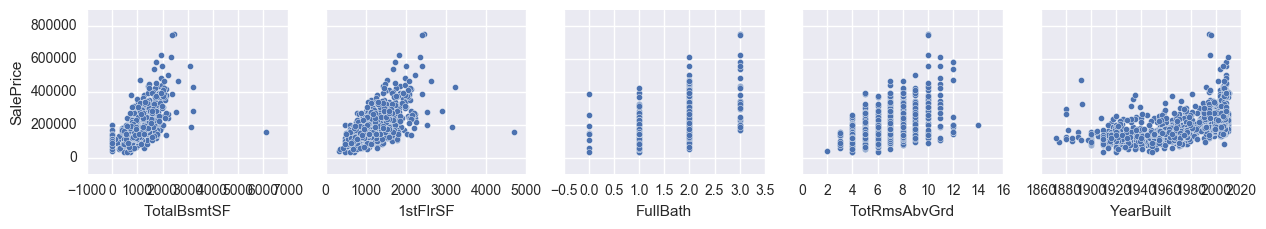

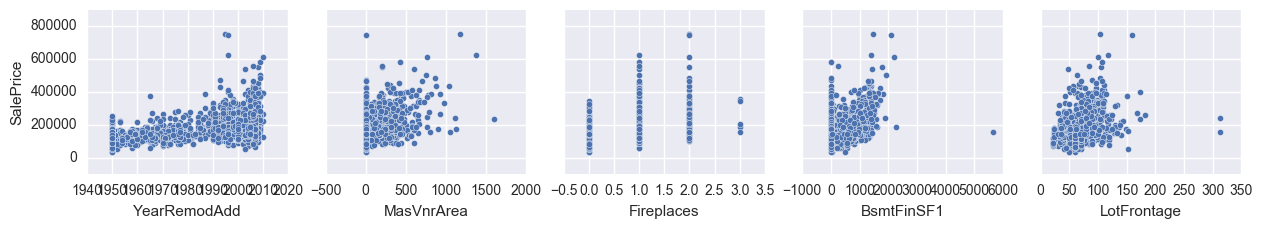

In [42]:
print 'Pairwise Correlation'
sns.set()
attributes = []
for i in xrange(5):
    attributes.append(core_attributes[i])
sns.pairplot(data=train,
                  x_vars=attributes,
                  y_vars=['SalePrice'])
plt.show()

sns.set()
attributes = []
for i in xrange(5,10):
    attributes.append(core_attributes[i])
sns.pairplot(data=train,
                  x_vars=attributes,
                  y_vars=['SalePrice'])
plt.show()

sns.set()
attributes = []
for i in xrange(10,15):
    attributes.append(core_attributes[i])
sns.pairplot(data=train,
                  x_vars=attributes,
                  y_vars=['SalePrice'])
plt.show()

usual rule: alpha = 109.854114 
one stand error rule: alpha = 159.985872


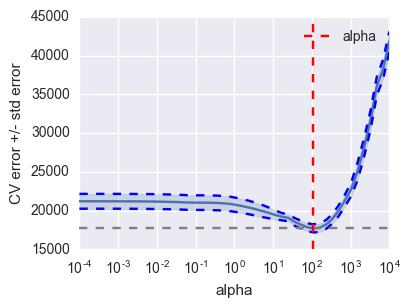

In [43]:
# function to estimate alpha using cross validation
from sklearn import metrics
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut




def estimate_alpha(alpha_list, n_folds):
    scores = list()
    scores_std = list()
    min_score = 100000
    # run the the list of alphas
    for alpha in alpha_list:
        lassoModel = linear_model.Lasso(alpha=alpha)
        this_scores = -cross_val_score(lassoModel, trainX, trainY, scoring="neg_mean_absolute_error", cv=n_folds, n_jobs=1)
        scores.append(np.mean(this_scores))
        scores_std.append(np.std(this_scores)) 
        
    # find the minimum of the scores and the index
    
    optAlphaIdx = np.argmin(scores)
    optAlpha = alpha_list[optAlphaIdx]
    lowerBound = scores[optAlphaIdx] + (scores_std[optAlphaIdx]/np.sqrt(n_folds))
    # get the smallest alpha within +/- std error
    for i, alpha in enumerate(alpha_list):
        if scores[i] <= lowerBound and i>optAlphaIdx:
            oneStdAlpha = alpha
            break
    return scores, scores_std, optAlpha, oneStdAlpha

# function to plot the cross-validation error curve
def plot_cv_curve(alphas, scores, scores_std, optAlpha, n_folds):
    scores, scores_std = np.array(scores), np.array(scores_std)
    plt.figure().set_size_inches(4, 3)
    plt.semilogx(alphas, scores)

    # plot error lines showing +/- std. errors of the scores
    std_error = scores_std / np.sqrt(n_folds)

    plt.semilogx(alphas, scores + std_error, 'b--')
    plt.semilogx(alphas, scores - std_error, 'b--')

    # alpha=0.2 controls the translucency of the fill color
    plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)
    plt.ylabel('CV error +/- std error')
    plt.xlabel('alpha')
    plt.axhline(np.min(scores), linestyle='--', color='.5')
    plt.axvline(optAlpha, linestyle='--', color='r', label='alpha')
    plt.legend()
    plt.xlim([alphas[0], alphas[-1]])

    
alphas = np.logspace(-4, 4, 50)
scores, scores_std, k5optalpha, k5osralpha = estimate_alpha(alphas, 5)
print ("usual rule: alpha = %f \none stand error rule: alpha = %f"%(k5optalpha,k5osralpha))

plot_cv_curve(alphas, scores, scores_std, k5optalpha, 5)

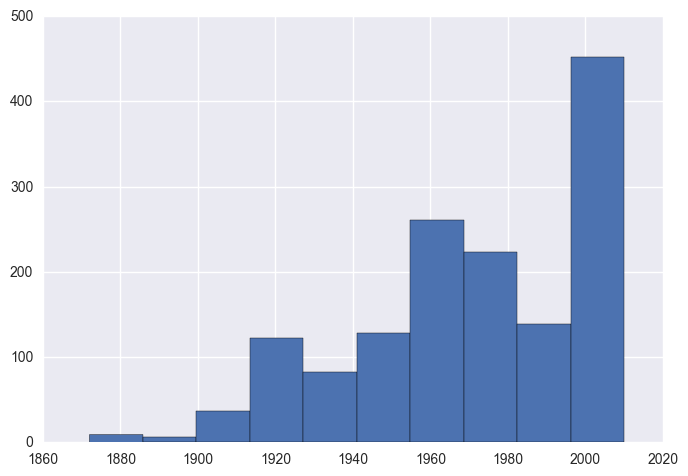

In [44]:
train_core = pd.get_dummies(train_core)
train_core = train_core.fillna(train_core.mean())
train_core['YearBuilt'].hist()

Use the alpha from CV to do the regression for test set:

In [45]:
lassoModel = linear_model.Lasso(alpha=0.001)
lassoModel.fit(trainX,trainY)
lasso_preds = lassoModel.predict(testX)
#print lasso_preds


In [76]:
from sklearn import ensemble
#XGBoost = ensemble.GradientBoostingRegressor(n_estimators=3600, learning_rate=0.05,loss='huber')
XGBoost = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             
                             subsample=0.5213, silent=1,
                              nthread = -1)
XGBoost.fit(trainX, trainY)
XGBoost_preds = XGBoost.predict(testX)
#print XGBoost_preds

In [77]:
preds = lasso_preds * 0.1 + XGBoost_preds * 0.9
#print preds

# multi = np.repeat(1.0, len(testID))
# for i,id in enumerate(testID):
#     year = test.loc[i]['YrSold']
#     mo = test.loc[i]['MoSold']
    
#     if year == 2010 :
#         if (mo == 7) or (mo ==6) or (mo<=4):
#             multi[i] /=1.01  
#     elif year == 2009:
#         if (mo ==1) or (mo ==6) or(mo<=4):
#             multi[i] /= 1.04
#         elif (mo==2) or(mo==3) or (mo==4):
#             multi[i] /= 1.03
#         elif (mo==5)or(mo==6)or(mo==7)or(mo==8):
#              multi[i] /=1.02
#         elif mo >=9:
#              multi[i] /= 1.01
#     elif year ==2008:
#         if (mo ==1) or (mo ==12):
#             multi[i] /= 1.04
#         elif (mo==3) or(mo==11):
#             multi[i] /= 1.03
#         elif (mo==5)or(mo==10):
#              multi[i] /=1.01
#     elif year ==2007:
#         if (mo ==1) or (mo ==2):
#             multi[i] /= 1.08
#         elif (mo==3):
#             multi[i] /= 1.07
#         elif (mo==4):
#              multi[i] /=1.06
#         elif (mo>=5)and (mo<=10):
#             multi[i] /= 1.05
#         elif (mo>10):
#              multi[i] /=1.04
#     elif year ==2006:
#         if (mo ==1):
#             multi[i] /= 1.11
#         elif (mo==2) or (mo==3):
#             multi[i] /= 1.10
#         elif (mo==4) or (mo>-10):
#              multi[i] /=1.09
#         elif ((mo>=5)and (mo<=7)) or (m0==9):
#             multi[i] /= 1.08
#         elif (mo==8):
#              multi[i] /=1.07
        
# preds = preds*multi


In [78]:
solution = pd.DataFrame({"Id":testID, "SalePrice":preds})
solution.to_csv("./submissions/lasso+xgboost.csv", columns=["Id","SalePrice"], index = False)

In [79]:
len(preds)

1459